<a href="https://colab.research.google.com/github/dwishashah/Machine-Learning/blob/main/ML_Exp7_boosting_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Task 1:

import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Generating synthetic dataset (Dataset 1)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=200) 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.875


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = AdaBoostClassifier(base_estimator = lr)
clf = clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred1))

Accuracy: 0.85


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_depth = [1,2,3,4,5,6,7,8,9,10,11]

for i in max_depth:
  dtc = DecisionTreeClassifier(max_depth = i, random_state=42)
  ada = AdaBoostClassifier(base_estimator = dtc)
  ada.fit(X_train,y_train)
  y_pred2 = ada.predict(X_test)
  print(f"\nMax Depth:{i}")
  print(f"Accuracy = {accuracy_score(y_pred2,y_test)}")


Max Depth:1
Accuracy = 0.83

Max Depth:2
Accuracy = 0.9

Max Depth:3
Accuracy = 0.875

Max Depth:4
Accuracy = 0.92

Max Depth:5
Accuracy = 0.95

Max Depth:6
Accuracy = 0.935

Max Depth:7
Accuracy = 0.92

Max Depth:8
Accuracy = 0.945

Max Depth:9
Accuracy = 0.925

Max Depth:10
Accuracy = 0.95

Max Depth:11
Accuracy = 0.815


In [ ]:
learning_rate = [0.1,0.3,0.5,0.7,0.9,0.21,0.23,0.87,0.25,0.45,0.61]

for i in learning_rate:
  dtc = DecisionTreeClassifier(random_state=42)
  ada = AdaBoostClassifier(base_estimator = dtc,learning_rate=i)
  ada.fit(X_train,y_train)
  y_pred3 = ada.predict(X_test)
  print(f"\nLearning Rate:{i}")
  print(f"Accuracy = {accuracy_score(y_pred3,y_test)}")


Learning Rate:0.1
Accuracy = 0.81

Learning Rate:0.3
Accuracy = 0.8

Learning Rate:0.5
Accuracy = 0.79

Learning Rate:0.7
Accuracy = 0.785

Learning Rate:0.9
Accuracy = 0.79

Learning Rate:0.21
Accuracy = 0.805

Learning Rate:0.23
Accuracy = 0.81

Learning Rate:0.87
Accuracy = 0.79

Learning Rate:0.25
Accuracy = 0.795

Learning Rate:0.45
Accuracy = 0.79

Learning Rate:0.61
Accuracy = 0.81


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def get_models():
  models = []
  for max_depth in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    ada = AdaBoostClassifier(estimator=dtc, random_state=42)
    models.append(ada)
  return models

def evaluate_model(model, X, y):
  kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(model, X, y, cv=kfold)
  print(f"Accuracy: {scores.mean():.3f}")
  
models = get_models()

for model in models:
  evaluate_model(model, X, y)

Accuracy: 0.809
Accuracy: 0.870
Accuracy: 0.879
Accuracy: 0.888
Accuracy: 0.924
Accuracy: 0.934
Accuracy: 0.926
Accuracy: 0.940
Accuracy: 0.924
Accuracy: 0.939


In [ ]:
def get_models():
  models = []
  for lr in [0.1,2.1,0.1]:
    dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
    ada = AdaBoostClassifier(estimator=dtc, learning_rate=lr, random_state=42)
    models.append(ada)
  return models

def evaluate_model(model, X, y):
  kfold = KFold(n_splits=10, shuffle=True, random_state=101)
  scores = cross_val_score(model, X, y, cv=kfold)
  print(f"Learning rate: {model.learning_rate:.2f}, Accuracy: {scores.mean():.3f}")

models = get_models()
for model in models:
  evaluate_model(model, X, y)

Learning rate: 0.10, Accuracy: 0.856
Learning rate: 2.10, Accuracy: 0.517
Learning rate: 0.10, Accuracy: 0.856


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100, 500],'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
ada = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
Best score: 0.83625


ValueError: ignored

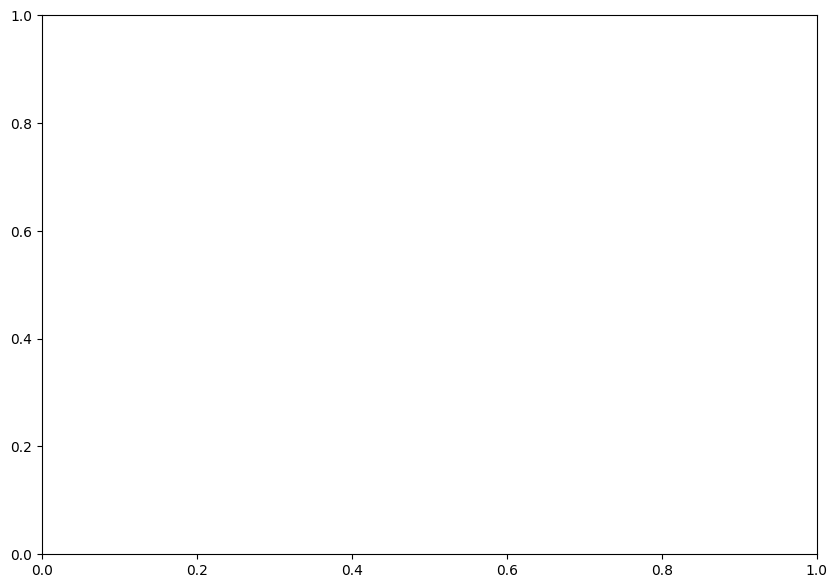

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([dtc_acc, ada_acc], labels=['Decision Tree Classifier', 'AdaBoost Classifier with Decision Tree base learner'])
ax.set_title('Comparison of Decision Tree Classifier and AdaBoost Classifier with Decision Tree base learner')
ax.set_ylabel('Accuracy')
plt.show()